# Objective: Analysis of Haberman's Survival Dataset# 
### The Haberman's Survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 
#### The features provided in the dataset are:
#### 1. Age : The age of the patient during the cancer treatment.
#### 2. Year of treatment : The year in the which the patient was treated (between 1958 to 1970). 
#### 3. Positive lymph nodes :  The number of axillary lymph nodes containing cancer.
#### 4. Surivival Status after 5 years(target variable) : Patient's survival status 5 years after treatment.

#### I will be doing some EDA on the dataset and will be creating a classification model and testing out the predictions on the portion of given dataset itself.

In [ ]:
#libraries for importing and plotting the dataset. 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
#reading the csv and giving the column names.
data = pd.read_csv('datasets_474_966_haberman.csv',header=None,
                   names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])

In [18]:
#The dataset contains 306 rows and 4 columns.
data.shape

(306, 4)

In [19]:
#There are no missing values and checking the datatype of all the columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [20]:
#changing the "survival_status_after_5_years" column's datatype from int to str so it has a meaning and be classified.
data['survival_status_after_5_years'] = data['survival_status_after_5_years'].astype('str')

In [7]:
data.head()

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
#Some descriptive statistical data
data.describe()

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Some observations from the above description:
1. Patient's age ranges from 30 to 83 years with the mean about 52 years.
2. There are a large number of patients treated in and around year 1962.
3. Though the patient with highest number of positive nymph nodes is 52, average number of positive nymph nodes is    approximately 4.

###  Univariate Analysis

In [67]:
data1 = data
data1['survival_status_after_5_years'] = target

/home/gunjan/anaconda3/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


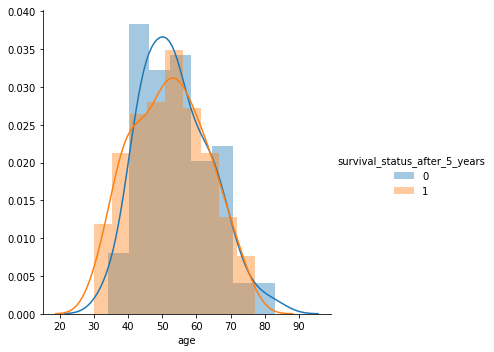

/home/gunjan/anaconda3/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


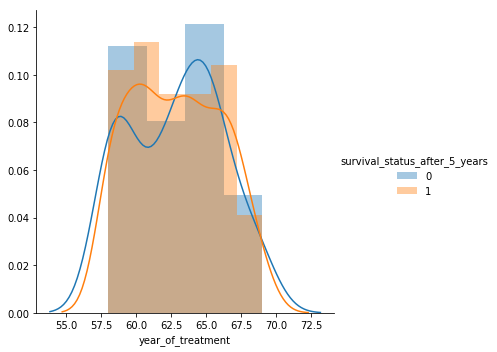

/home/gunjan/anaconda3/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


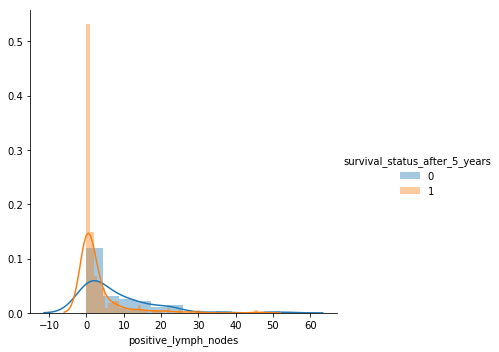

In [69]:
for idx, feature in enumerate(list(data1.columns)[:-1]):
    fg = sns.FacetGrid(data1, hue='survival_status_after_5_years', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

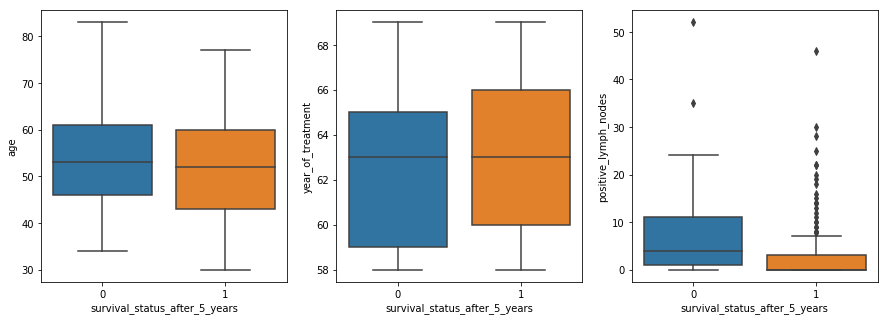

In [70]:
#BOXPLOTS: These plots help us easily indentify outliers in our dataset.

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(data1.columns)[:-1]):
    sns.boxplot( x='survival_status_after_5_years', y=feature, data=data1, ax=axes[idx])
plt.show() 

### Multivariate Analysis

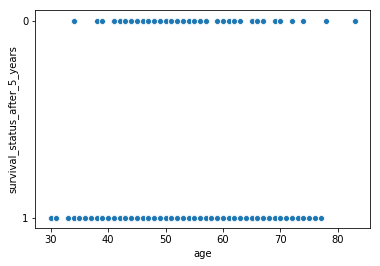

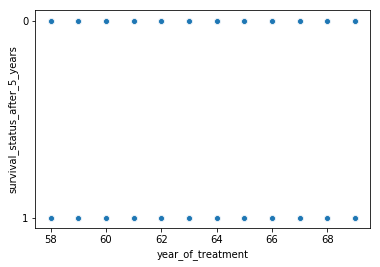

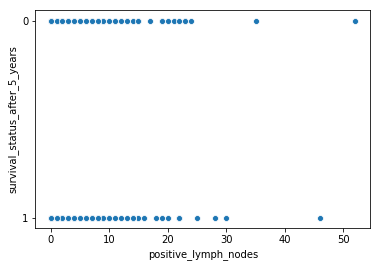

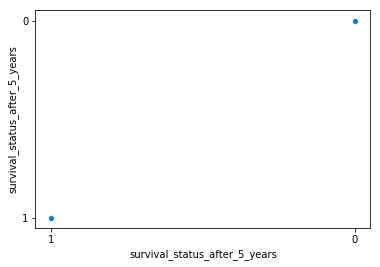

In [79]:
#As the 'survival_status_after_5_years' columns is str so it is not treated as integers
for i in data.columns:
    sns.scatterplot(x=i, y='survival_status_after_5_years',data=data1)
    plt.show() 

In [22]:
#replacing '2' with '0' and keeping the '1' as it is.
#('1' as in the patient survied and '0' denoting the patient could not.)
data['survival_status_after_5_years'].replace(['2'],['0'],inplace=True)

In [23]:
#The dataset is imbalanced as many of the total patients have survived.
data['survival_status_after_5_years'].value_counts()

1    225
0     81
Name: survival_status_after_5_years, dtype: int64

### Simple XGB modelling using cross-validation.

In [52]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score

kfold = KFold(n_splits=4)

In [30]:
target = data['survival_status_after_5_years']

data.drop('survival_status_after_5_years',axis=1,inplace=True)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.15)

In [43]:
from xgboost import XGBClassifier

In [63]:
y_pred = []
err = []

for i,j in kfold.split(data,target):
    x_train, x_test = data.iloc[i],data.iloc[j]
    y_train,y_test = target[i], target[j]
    
    xgb = XGBClassifier(learning_rate=0.02,max_depth=4)
    xgb.fit(x_train,y_train)
    
    pred = xgb.predict(x_test)
    y_pred.append(pred)
    
    print("The accuracy score is",accuracy_score(y_test,pred))
    err.append(accuracy_score(y_test,pred))

The accuracy score is 0.7012987012987013
The accuracy score is 0.7272727272727273
The accuracy score is 0.75
The accuracy score is 0.7105263157894737


### Our notebook mainly focuses on the EDA of the dataset. We can also try fine tuning the XGB parameters to increase our accuracy. As the dataset is imbalanced, we could also try Random Over-Sampling but it increases the chance of overfitting.  